Maciej Górnik 

402325 gr 1b

AiR EAIiIB sem 6

# Ex. 1 - kNN - own implementation

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score

'''
1. Iris database - please divide into training and test sets
2. Find the best value of k for the selected test set (show on the graph change of k and the error - for both the test and training sets)
We choose the value of k (np. from 1 to n, where n will be the value for which the algorithm's results will deteriorate again)
For each example in the test set, we look for the k observations that are closest 
    to our analyzed example. Use the Eukleidesa distance to determine the distance.
The advantage of a given class among the “k” closest neighbors (from the training set) proves that the example belongs to this class.
Use the most frequent value of the “k” nearest neighbors“ as the value for an unclassified example.
For each case of k, after classifying all examples in the test set, count the error (e.g. the number of examples wrongly classified to the set size) and write the pair (k - error) to collect data for summary graphs.
'''

iris = datasets.load_iris()

In [34]:
#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [35]:
def knn(data,k):
  predictions = []
  for example_p in features_test:
    distances = []
    for test_p in features_train:
      dst = distance.euclidean(example_p, test_p)
      distances.append(dst)
    idx = np.argpartition(distances, k)
    k_nearest_labels = labels_train[idx[:k]]
    count_class_occ = dict([x,list(k_nearest_labels).count(x)] for x in set(k_nearest_labels))
    pred = max(count_class_occ, key=count_class_occ.get)
    predictions.append(pred)
  output = accuracy_score(labels_test, predictions)
  return predictions, output

# Testing function
predictions, output = knn(iris,5)
print(f"Accuracy: {output}")
print(f"Prediction: {predictions}")

Accuracy: 0.9555555555555556
Prediction: [1, 1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 2]


In [36]:
# Test KNN method for k from 1 to n
# n: max k value
n = 40

#list of accurations for every k
accs = []
for i in range(1,n):
  predictions, output = knn(features_train,i)
  accs.append(output)

Text(0.5, 1.0, 'Own implementation of KNN')

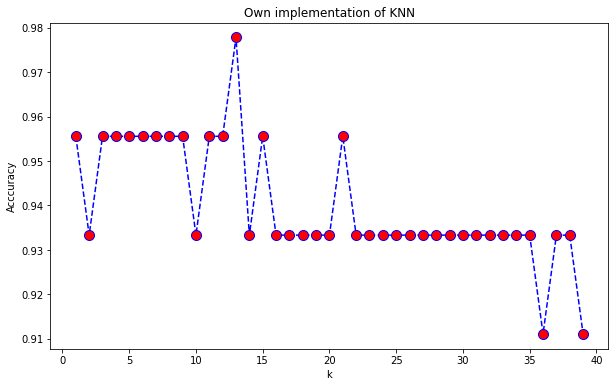

In [37]:
#Ploting results
plt.figure(figsize=(10,6))
plt.plot(range(1,n),accs,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel("k")
plt.ylabel("Acccuracy")
plt.title("Own implementation of KNN")

***Best k fo set depends on how we divide dataset into test and train sets. But for most cases it is value between 12 and 16. For higher k accuracy is getting lower.***

# Ex. 2 - kNN - Python (sklearn)


In [38]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(features_train,labels_train)
ed = knn.predict(features_test)
accuracy_score(labels_test, ed)
print(f"Accuracy: {accuracy_score(labels_test, ed)}")
print(f"Prediction: {ed}")

Accuracy: 0.9555555555555556
Prediction: [1 1 0 1 2 0 1 2 0 0 2 0 2 1 0 0 2 1 1 1 1 0 2 1 2 1 2 1 0 0 2 2 2 0 1 1 0
 1 0 0 2 1 0 0 2]


In [40]:
accs2 = []
for i in range(1,n):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(features_train,labels_train)
  ed = knn.predict(features_test)
  accs2.append(accuracy_score(labels_test, ed))

Text(0.5, 1.0, 'KNN using sklearn')

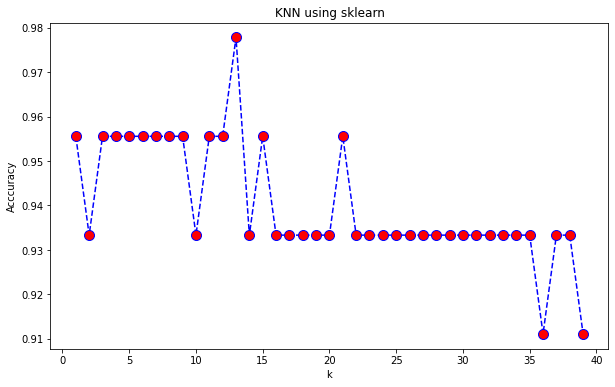

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,n),accs2,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel("k")
plt.ylabel("Acccuracy")
plt.title("KNN using sklearn")

Text(0.5, 1.0, 'KNN using sklearn')

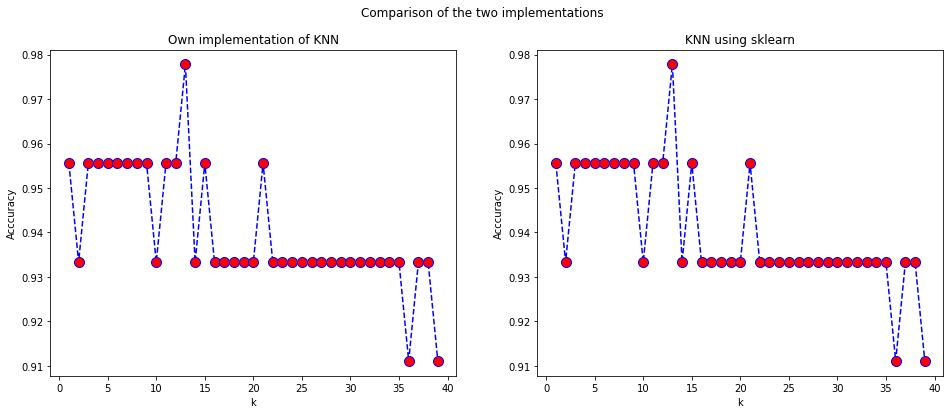

In [48]:
#Comparison of the two implementations
fig, (ax1, ax2) = plt.subplots(1, 2,figsize= (16,6))
fig.suptitle('Comparison of the two implementations')

ax1.plot(range(1,n),accs,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
ax1.set_xlabel("k")
ax1.set_ylabel("Acccuracy")
ax1.set_title("Own implementation of KNN")

ax2.plot(range(1,n),accs2,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
ax2.set_xlabel("k")
ax2.set_ylabel("Acccuracy")
ax2.set_title("KNN using sklearn")

As we can see my own implementation gives the same results as sklearn KNN alghoritm

# Ex.3 - Decision trees

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from keras.datasets import mnist
 
 
 
# wczytywanie danych
#Ex.1.Divide the data into parameters X and answer y:
 
(train_X, train_y), (test_X, test_y) = mnist.load_data()

X = np.concatenate([train_X,test_X])
y = np.concatenate([train_y,test_y])
 
# Standardization
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
 
# Convert digit 10 -> 0 (error in the dataset)    
y[np.where(y==10)]=0
 
# the height and width of the picture with the number
h = 28
w = 28


In [79]:
# Ex 2. Please display the number of digits and the number of pixels per image
print('X size (number of images, num of rows, num of cols): ',str(X.shape))
print('y size (number of items): ' + str(y.shape))
print(f'Number pixels per image: {X.shape[1]*X.shape[2]}')

X size (number of images, num of rows, num of cols):  (70000, 28, 28)
y size (number of items): (70000,)
Number pixels per image: 784


In [60]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

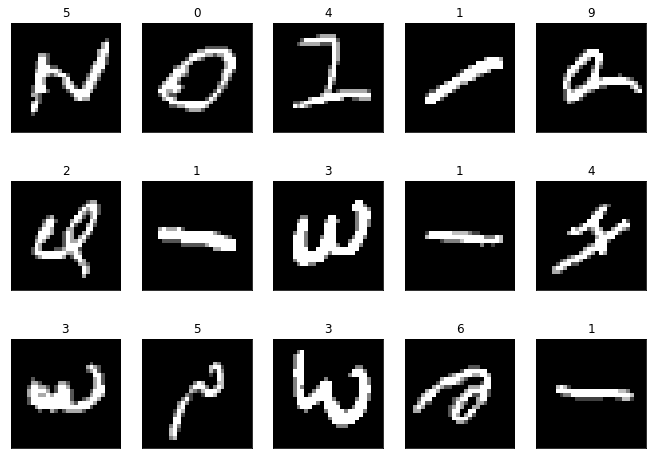

In [74]:
# Ex. 3. Please display sample digits from the dataset (functionplot_mnist).
w, h = 28, 28
plot_mnist(X, y, h, w,n_row=3, n_col=5)

In [82]:
# Ex. 4. Please divide the dataset into learner (70%) and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [86]:
# Ex. 5. Create an instance of the classifier, then train and predict for test data.
# Tree parameters:
DEPTH = 10


X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape((X_test.shape[0], 28*28,))

clasif = tree.DecisionTreeClassifier(max_depth = DEPTH)
clasif.fit(X_train, y_train)

y_pred = clasif.predict(X_test)
print(f'Prediction: {y_pred}')

Prediction: [7 7 2 ... 0 7 0]


In [87]:
# Zad 6. Please provide F1 result, confusion matrix and classification report
print(f'F1 Result:\n{f1_score(y_test, y_pred, average=None)}\n\n')
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}\n\n')
print(f'Clasification report:\n{classification_report(y_test,y_pred)}\n\n')

F1 Result:
[0.90494479 0.94094488 0.79147142 0.77468707 0.81858626 0.74469678
 0.87562189 0.88009259 0.77221807 0.76393443]


Confusion matrix:
[[1885    0   32   19   11   49   39   11   51   22]
 [   3 2151   50   18    9   14    2   14   27   12]
 [  33   19 1689   71   31   27   37   51   91   22]
 [  18   13   84 1671   25  210   22   27   63   77]
 [  17    9   38   31 1656   55   25   22   31  199]
 [  24   12   51  126   30 1492   42   18   47   58]
 [  27    2   70   14   49   51 1760    4   62   12]
 [   4   20   54   42   34   21    3 1901   30   81]
 [  17   40   93   47   27   96   34   15 1551  109]
 [  19    6   36   65   91   92    5   67   35 1631]]


Clasification report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2119
           1       0.95      0.94      0.94      2300
           2       0.77      0.82      0.79      2071
           3       0.79      0.76      0.77      2210
           4       0.84      0